In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [140]:
# file_name = 'DWL_USGS_Sites/Malletts_Creek_Discharge'
# var = 'Mean_CFS'
# file_name = 'DWL_USGS_Sites/Malletts_Creek_Elevation'
# var = 'Gage_Height'

# file_name = 'DWL_USGS_Sites/Huron_River_Discharge'
# var = 'Mean_CFS'
# file_name = 'DWL_USGS_Sites/Huron_River_Elevation'
# var = 'Gage_Height'

# file_name = 'DWL_USGS_Sites/Allen_Creek_Discharge'
# var = 'Mean_CFS'
# file_name = 'DWL_USGS_Sites/Allen_Creek_Elevation'
# var = 'Gage_Height'

# file_name = 'DWL_USGS_Sites/Mill_Creek_Discharge'
# var = 'Mean_CFS'
# file_name = 'DWL_USGS_Sites/Mill_Creek_Elevation'
# var = 'Gage_Height'

file_name = 'DWL_USGS_Sites/Huron_River_Hamburg_Discharge'
var = 'Mean_CFS'

In [141]:
def DWL_CCDF_df(file_name, var):
    
    # df = pd.read_csv(file_name + ".csv")

    # df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    time_period_data = df

    sorted_data = time_period_data.sort_values(var, ascending=False)

    time_period_data['ranked_column_m'] = sorted_data[var].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", time_period_data['ranked_column_m'].head())

    n = len(time_period_data)

    df['P_Value'] = range(1, len(df) + 1)

    time_period_data['P_Value'] = (time_period_data['ranked_column_m'] / (n + 1)) * 100
    print(time_period_data['P_Value'])
    # df = august_data
    # return df
    return(time_period_data)

In [142]:
def DWL_plotTimeSeries(file_name, var):

    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    # Plot the time series
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df['Datetime'], df[var], marker='o', linestyle='-')

    plt.title('Time Series Plot of ' + file_name)
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

    return plt.show()

ranked column m: 22921    1352.0
22922    1480.0
22923    1639.0
22924    1826.0
22925    2027.0
Name: ranked_column_m, dtype: float64
22921    37.010676
22922    40.514645
22923    44.867232
22924    49.986313
22925    55.488639
           ...    
26568    73.008486
26569    72.652614
26570    54.749521
26571    36.955927
26572    28.113879
Name: P_Value, Length: 3652, dtype: float64


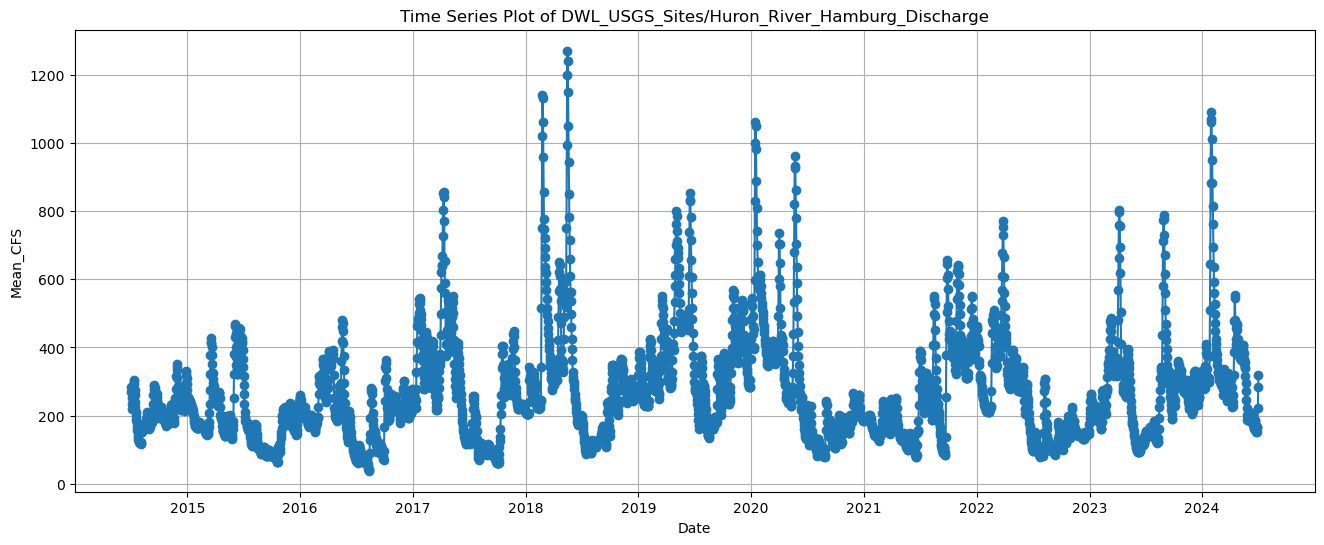

In [143]:
df = DWL_CCDF_df(file_name, var)
DWL_plotTimeSeries(file_name, var)


In [144]:
def DWL_CCDF_plot_P(df, x, y, P):
    df_sorted = df.sort_values(by='P_Value')

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')

    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    if var == 'Mean_CFS':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')
    
    if var == 'Gage_Height':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + .1),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter

    if var == 'Mean_CFS':
        plt.title('CCDF of DWL Site: ' + file_name + " for Mean Daily Flow with " + str(P) + " exceedance probability")
    if var == 'Gage_Height':
        plt.title('CCDF of DWL Site: ' + file_name + " for Gage Height with " + str(P) + " exceedance probability")

    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    
    if var == 'Mean_CFS':
        plt.ylabel('Mean Daily Flow (cfs)')
    if var == 'Gage_Height':
        plt.ylabel('ELevation/Gage Height (feet)')
    plt.grid(True)

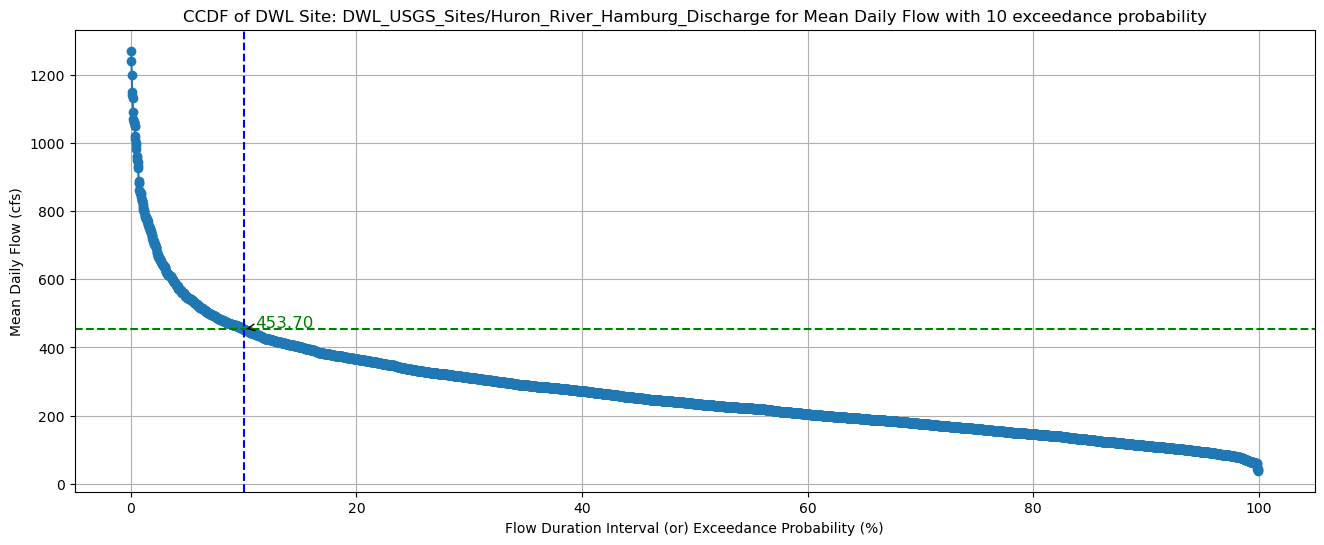

In [145]:
# df = DWL_plotTimeSeries(file_name, var)
DWL_CCDF_plot_P(df, x='P_Value', y=var, P=10)